# clustring techniques for informative neural response extraction

Here we will test our matlab produced feature vectors segmentation.

In [57]:
print(__doc__)

import time
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

Automatically created module for IPython interactive environment


In [58]:
cd 'C:\Users\noambox\Documents\Sync\Neural data\stat_features\'

C:\Users\noambox\Documents\Sync\Neural data\stat_features


In [59]:
df_ori = pd.read_csv('ori_features_last.csv')
df_crp = pd.read_csv('crp_features_last.csv')

actual clustering (see http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)
ori dataset

In [88]:
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(df_ori)

 # estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

In [89]:
# create clustering estimators
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
two_means = cluster.MiniBatchKMeans(n_clusters=2)
ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward',
                                       connectivity=connectivity)
spectral = cluster.SpectralClustering(n_clusters=2,
                                      eigen_solver='arpack',
                                      affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=.2)
affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                   preference=-200)

average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock", n_clusters=2,
    connectivity=connectivity)

birch = cluster.Birch(n_clusters=2)

In [90]:
clustering_algorithms = [
    two_means, affinity_propagation, ms, spectral, ward, average_linkage,
    dbscan, birch]

colors = np.array([x for x in 'brgrcmykbrgrcmykbrgrcmykbrgrcmyk'])
colors = np.hstack([colors] * 20)

clustering_names = [
    'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
    'SpectralClustering', 'Ward', 'AgglomerativeClustering',
    'DBSCAN', 'Birch']


plot_num = 1
i_dataset = 0

# plots
clust_zip = zip(clustering_names, clustering_algorithms)

In [95]:
cd 'C:\Users\noambox\Documents\Sync\Thesis writing\figs\chapter - results'

C:\Users\noambox\Documents\Sync\Thesis writing\figs\chapter - results


## 1.1 Spectral clustering ORI

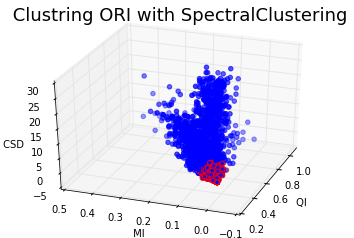

In [101]:
%matplotlib inline
# %matplotlib qt

algo_idx = 3
name = clust_zip[algo_idx][0]
algorithm = spectral

# predict cluster memberships
t0 = time.time()
spectral.fit(X)
t1 = time.time
if hasattr(algorithm, 'labels_'):
        y_pred = spectral.labels_.astype(np.int)
else:
    y_pred = spectral.predict(X)
    
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ori.QI, df_ori.MI, df_ori.CSD, color=colors[y_pred].tolist(),s = 20)
# ax.view_init(elev=30., azim=-130) for crp
ax.view_init(elev=32., azim=-160)
plt.title(' Clustring ORI with ' +name, size=18)
ax.set_xlabel(' QI')
ax.set_ylabel(' MI')
ax.set_zlabel(' CSD')
# plt.show()
# plt.savefig('stat_feat_ori_'+name+'.png',dpi = 300)

In [102]:
np.savetxt('ori_clust_spectral.txt',y_pred)

In [35]:
print df_ori.shape
spectral.affinity_matrix_

(1944, 3)


<1944x1944 sparse matrix of type '<type 'numpy.float64'>'
	with 24244 stored elements in Compressed Sparse Row format>

## 1.2 Affinity propagation

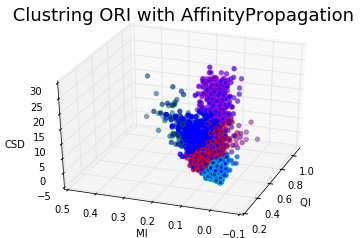

In [98]:
%matplotlib inline
# %matplotlib qt

algo_idx = 1
name = clust_zip[algo_idx][0]
algorithm = clust_zip[algo_idx][1]

# predict cluster memberships
t0 = time.time()
algorithm.fit(X)
t1 = time.time
if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)
    
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ori.QI, df_ori.MI, df_ori.CSD, color=colors[y_pred].tolist(),s = 20)
plt.title(' Clustring ORI with ' +name, size=18)
# ax.view_init(elev=30., azim=-130) for crp
ax.view_init(elev=32., azim=-160)
ax.set_xlabel(' QI')
ax.set_ylabel(' MI')
ax.set_zlabel('CSD')
plt.savefig('stat_feat_ori_'+name+'.png',dpi = 300)
# plt.show()

## 1.3 Ward

In [29]:
# %matplotlib qt
# %matplotlib inline

algo_idx =1
name = clust_zip[algo_idx][0]
algorithm = clust_zip[algo_idx][1]

# predict cluster memberships
t0 = time.time()
algorithm.fit(X)
t1 = time.time
if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)
    
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ori.QI, df_ori.MI, df_ori.CSD, color=colors[y_pred].tolist(),s = 20)
plt.title(' Clustring ORI with ' +name, size=18)
ax.view_init(elev=40., azim=200)
ax.set_xlabel(' QI')
ax.set_ylabel(' MI')
ax.set_zlabel(' CSD')
# plt.show()

## 2.1 Spectral clust on CRP

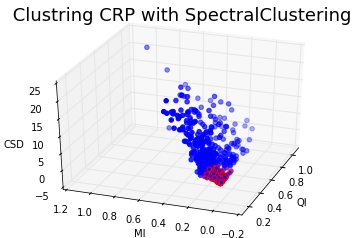

In [79]:
%matplotlib inline
# %matplotlib qt

algo_idx = 3
name = clust_zip[algo_idx][0]
algorithm = clust_zip[algo_idx][1]

# predict cluster memberships
t0 = time.time()
algorithm.fit(X)
t1 = time.time
if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)
    
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_crp.QI, df_crp.MI, df_crp.CSD, color=colors[y_pred].tolist(),s = 20)
# ax.view_init(elev=30., azim=-130) for crp
ax.view_init(elev=32., azim=-160)
plt.title(' Clustring CRP with ' +name, size=18)
ax.set_xlabel('QI')
ax.set_ylabel('MI')
ax.set_zlabel('CSD')
plt.show()
plt.savefig('stat_feat_crp_'+name+'.png',dpi = 300)

In [84]:
cd 'C:\Users\noambox\Documents\Sync\Thesis writing\figs\chapter - results'

C:\Users\noambox\Documents\Sync\Thesis writing\figs\chapter - results


In [99]:
cd 'C:\Users\noambox\Documents\Sync\Neural data\stat_features\'

C:\Users\noambox\Documents\Sync\Neural data\stat_features


In [87]:
np.savetxt('crp_clust_affinity.txt',y_pred)

## 2.2 Affinity Propag


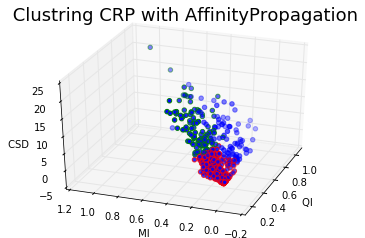

In [85]:
%matplotlib inline
# %matplotlib qt

algo_idx = 1
name = clust_zip[algo_idx][0]
algorithm = clust_zip[algo_idx][1]

# predict cluster memberships
t0 = time.time()
algorithm.fit(X)
t1 = time.time
if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)
    
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_crp.QI, df_crp.MI, df_crp.CSD, color=colors[y_pred].tolist(),s = 20)
# ax.view_init(elev=30., azim=-130) for crp
ax.view_init(elev=32., azim=-160)
plt.title(' Clustring CRP with ' +name, size=18)
ax.set_xlabel(' QI')
ax.set_ylabel(' MI')
ax.set_zlabel(' CSD')

plt.savefig('stat_feat_crp_'+name+'.png',dpi = 300)
# plt.show()